<a href="https://colab.research.google.com/github/Prachi1303/Crypto-currency-analyzer/blob/main/PYTHON_SBMP_CRYPTO_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** *** *** *** *** *** WELCOME TO CRYPTO CURRENCY ANALYSER *** *** *** *** *** ***
 
		List of Famous crypto currency with their symbol		
		************************************************				
01. BTC-USD: Bitcoin USD
02. ETH-USD: Ethereum USD
03. USDT-USD: Tether USD
04. BNB-USD: BNB USD
05. USDS-USD: USD coin USD
06. XRP-USD: XRP USD
07. ADA-USD: Cardano USD
08. HEX-USD: HEX USD
09. DOGE-USD: Dogecoin USD
10. STETH-USD: Lido USD
11. MATIC-USD: Polygon USD
12. SOL-USD: Solana USD
13. DOT-USD: Polkadot USD
14. LTC-USD: Litecoin USD
15. SHIB-USD: Shiba USD
16. WTRX-USD: Wrapped TRON USD
17. BUSD-USD: Binance USD
18. AVAX-USD: Avalanche USD
19. TRX-USD: TRON USD
20. DAI-USD: Dai USD
21. WBTC-USD: Wrapped Bitcoin USD
22. LINK-USD: Chainlink USD
23. ATOM-USD: Cosmos USD
24. UNI7083-USD: Uniswap USD
25. OKB-USD: OKB USD
**************************************************************************************

Enter the list of cryptocurrencies from above list to analyze (e.g., BTC-USD,ETH-USD

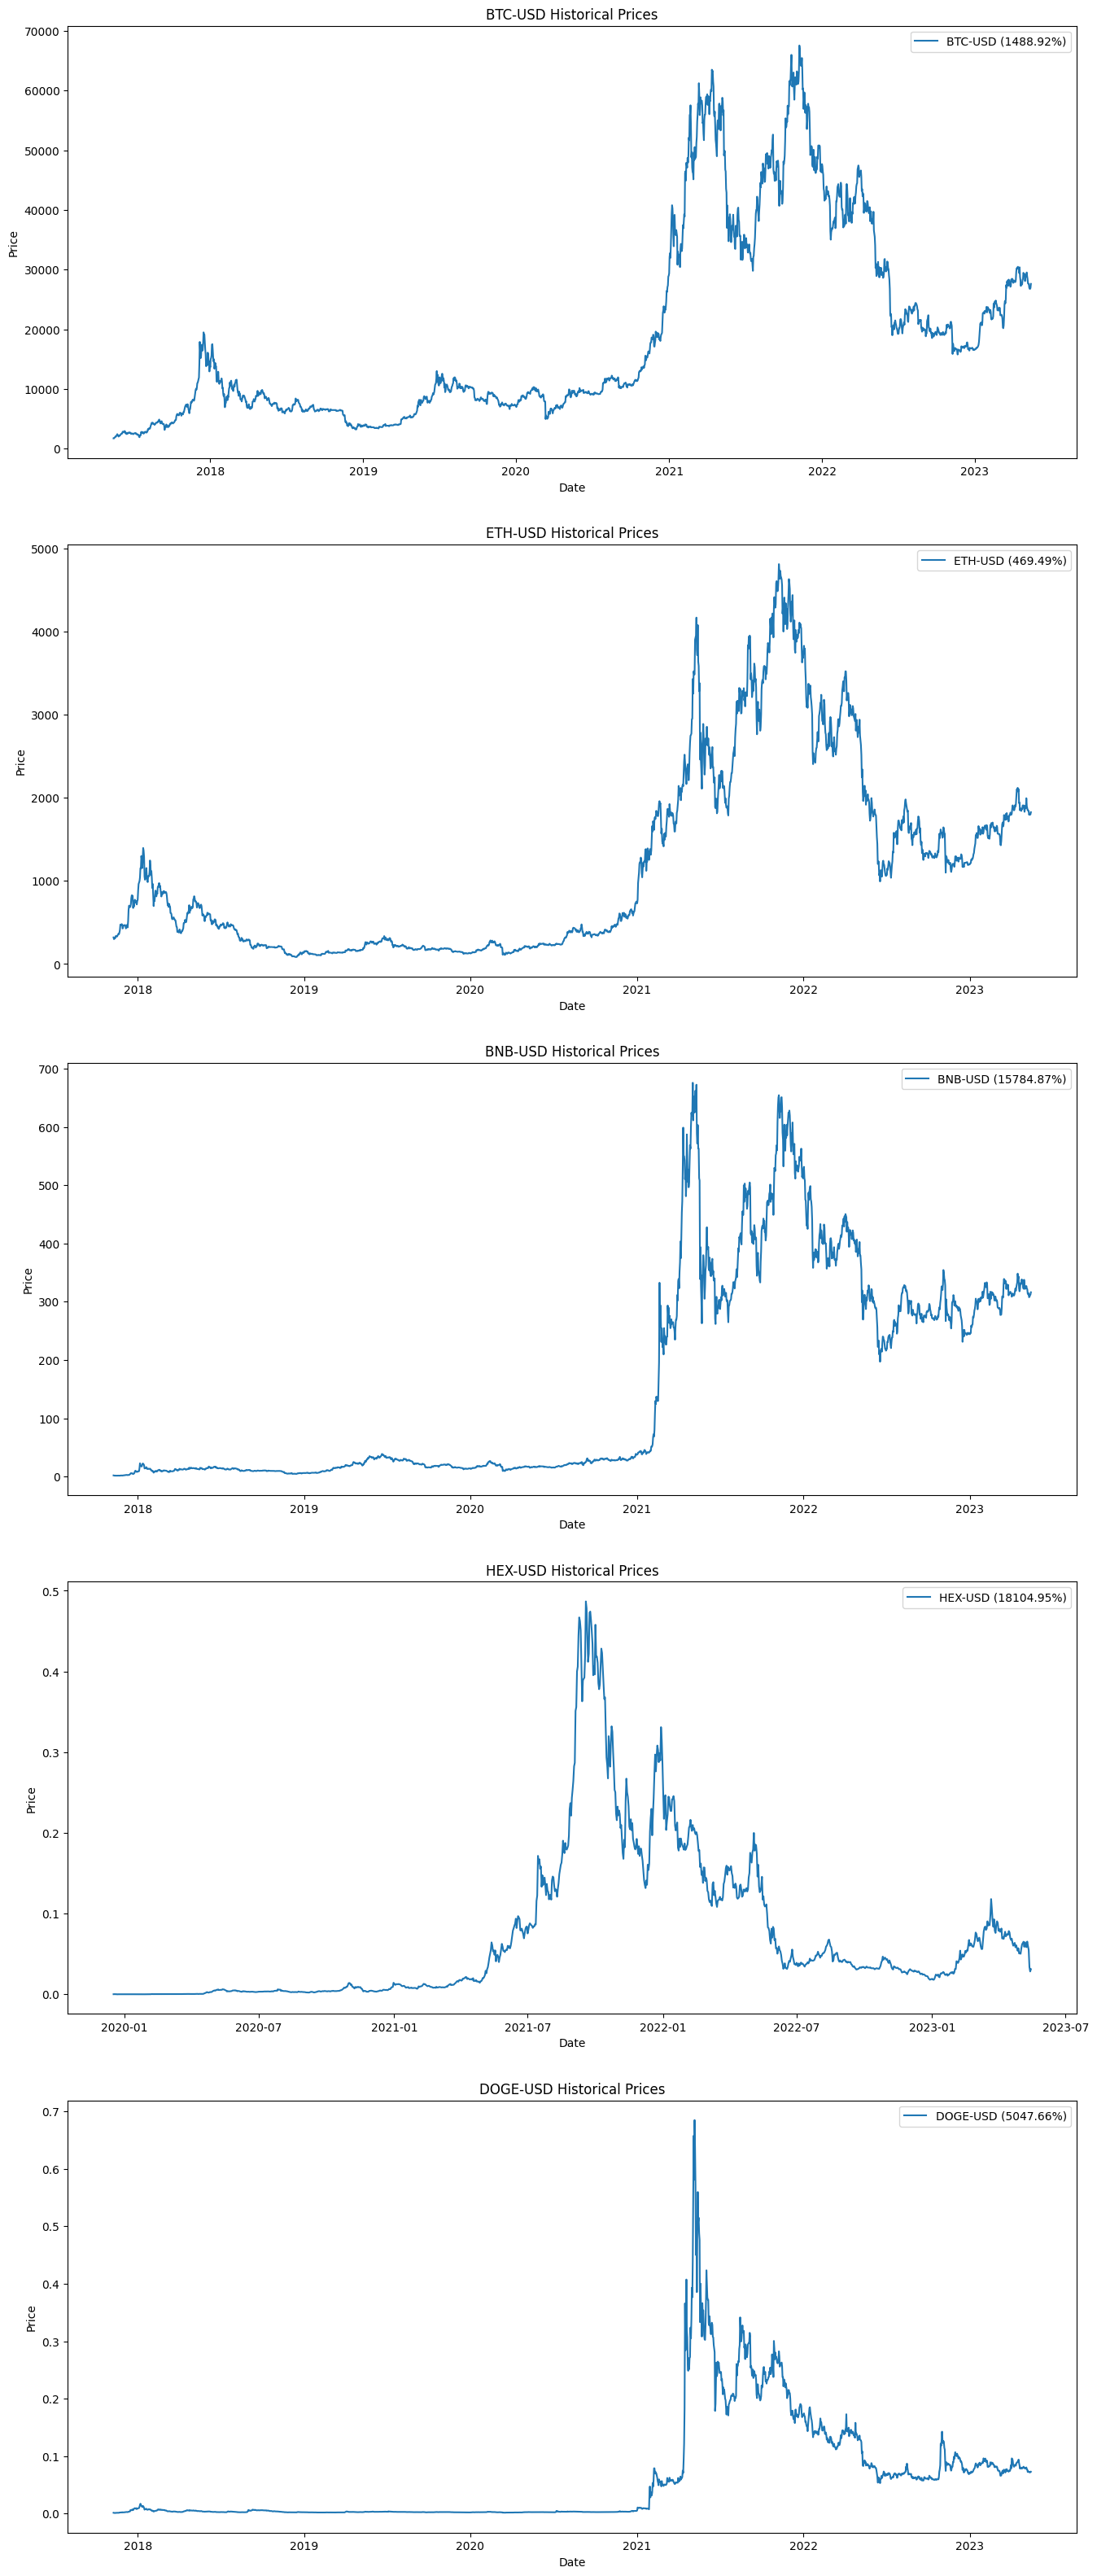

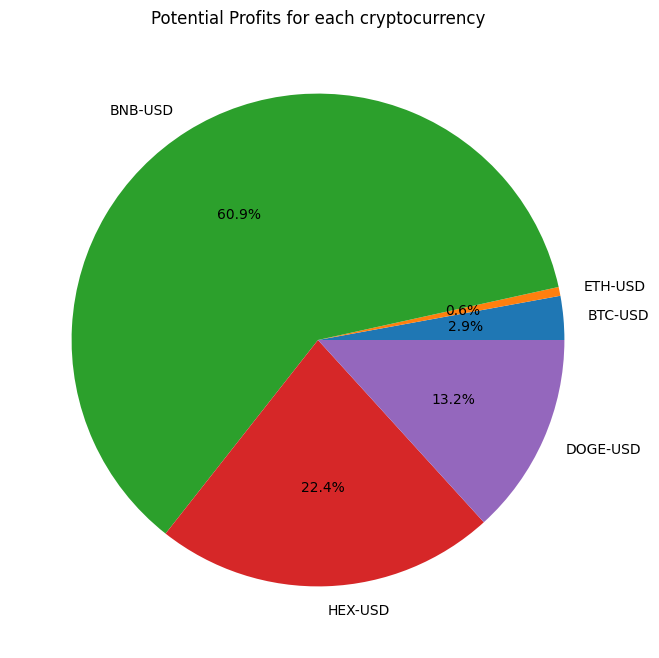

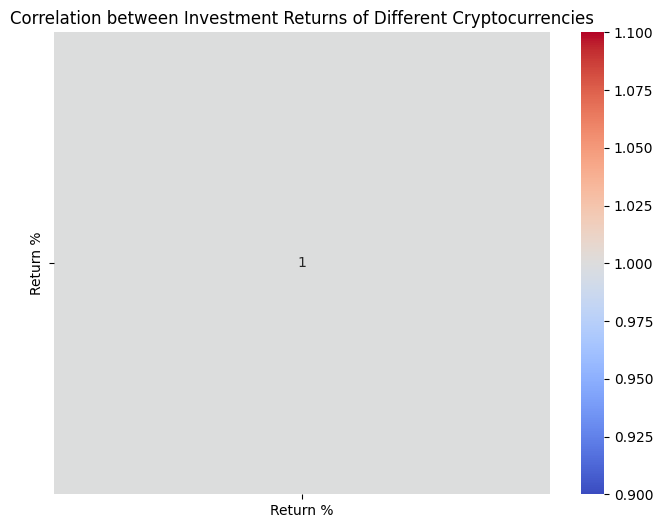

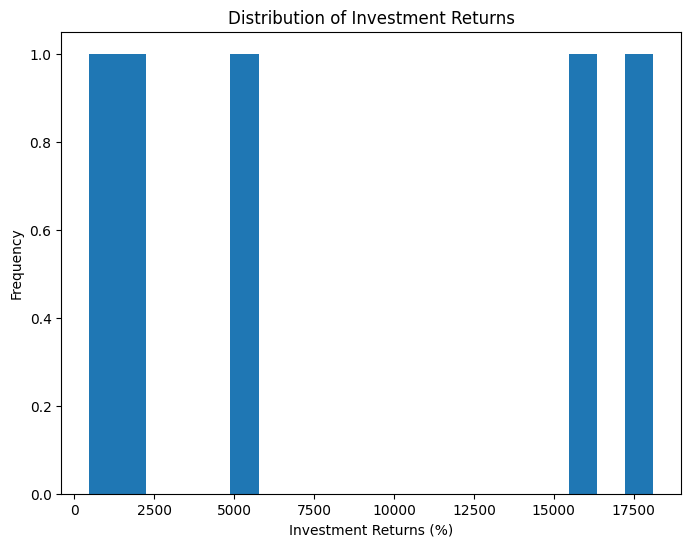

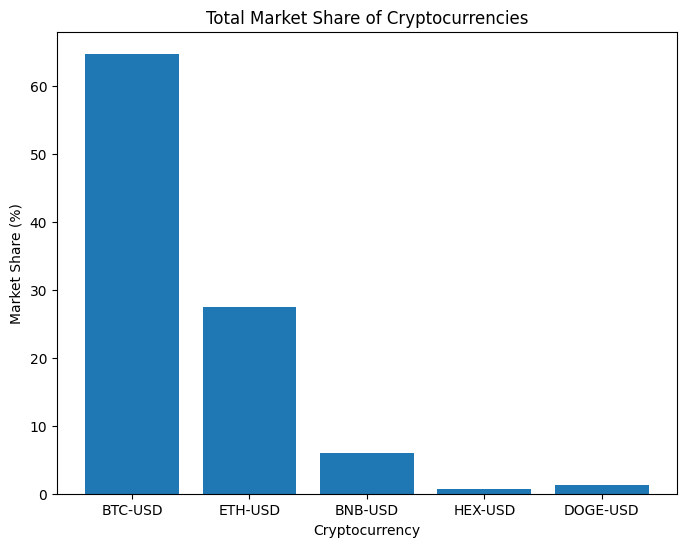

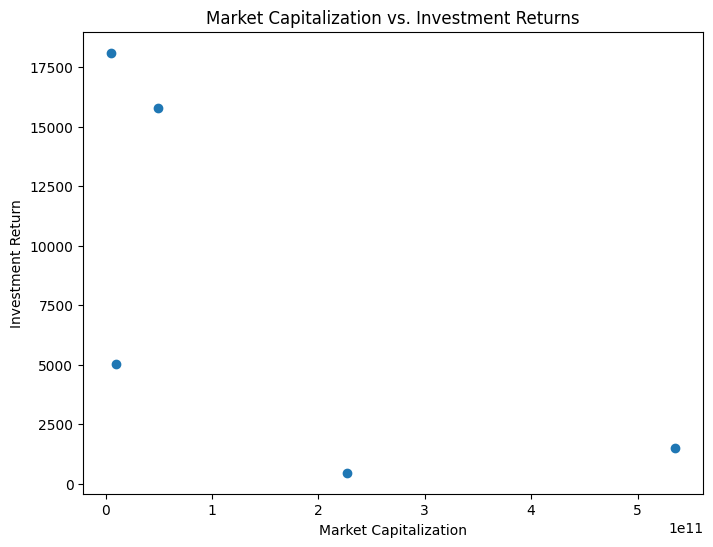

Top Gainers:
HEX-USD
BNB-USD
DOGE-USD
BTC-USD
ETH-USD

Top Losers:
ETH-USD
BTC-USD
DOGE-USD
BNB-USD
HEX-USD

Investment Returns:
BTC-USD: 1488.92%
ETH-USD: 469.49%
BNB-USD: 15784.87%
HEX-USD: 18104.95%
DOGE-USD: 5047.66%

Potential Profits:
BTC-USD: 744.46
ETH-USD: 150.24
BNB-USD: 15784.87
HEX-USD: 5793.58
DOGE-USD: 3432.41

Most Profitable Investment: BNB-USD


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Intro=("*** *** *** *** *** *** WELCOME TO CRYPTO CURRENCY ANALYSER *** *** *** *** *** ***\n \n\t\tList of Famous crypto currency with their symbol\t\t\n\t\t************************************************\t\t\t\t")
print(Intro)
Bitcoin_list=("01. BTC-USD: Bitcoin USD\n02. ETH-USD: Ethereum USD\n03. USDT-USD: Tether USD\n04. BNB-USD: BNB USD\n05. USDS-USD: USD coin USD\n06. XRP-USD: XRP USD\n07. ADA-USD: Cardano USD\n08. HEX-USD: HEX USD\n09. DOGE-USD: Dogecoin USD\n10. STETH-USD: Lido USD\n11. MATIC-USD: Polygon USD\n12. SOL-USD: Solana USD\n13. DOT-USD: Polkadot USD\n14. LTC-USD: Litecoin USD\n15. SHIB-USD: Shiba USD\n16. WTRX-USD: Wrapped TRON USD\n17. BUSD-USD: Binance USD\n18. AVAX-USD: Avalanche USD\n19. TRX-USD: TRON USD\n20. DAI-USD: Dai USD\n21. WBTC-USD: Wrapped Bitcoin USD\n22. LINK-USD: Chainlink USD\n23. ATOM-USD: Cosmos USD\n24. UNI7083-USD: Uniswap USD\n25. OKB-USD: OKB USD\n**************************************************************************************\n")
print(Bitcoin_list)

# Prompt the user to enter the list of cryptocurrencies to analyze
crypto_list = input("Enter the list of cryptocurrencies from above list to analyze (e.g., BTC-USD,ETH-USD): ").split(',')

# Prompt the user to enter the range of data they want to analyze
range_years = int(input("Enter the number of years of data to analyze: "))
start_date = pd.Timestamp.today() - pd.DateOffset(years=range_years)    
end_date = pd.Timestamp.today()

# Set the interval for data retrieval (1 day intervals)
interval = "1d"

# Compute the investment returns for each cryptocurrency and plot the data
fig, axs = plt.subplots(len(crypto_list), figsize=(16, 8 * len(crypto_list)))
crypto_returns = {}
crypto_investments = {}
crypto_market_caps = {}

for i, crypto_symbol in enumerate(crypto_list):
    # Retrieve the data using yfinance
    crypto_data = yf.download(crypto_symbol, start=start_date, end=end_date, interval=interval)
    # Keep only the Close price column
    crypto_data = crypto_data[['Close']]
    
    # Compute the percent change over the time period
    returns = np.array(crypto_data['Close'])
    return_pct = (returns[-1] - returns[0]) / returns[0] * 100
    crypto_returns[crypto_symbol] = return_pct

    # Prompt the user for the investment amount
    investment_amount = float(input(f"How much do you want to invest in {crypto_symbol} now? "))

    # Calculating the potential profit
    current_price = returns[-1]
    profit = (investment_amount * (1 + return_pct/100)) - investment_amount
    crypto_investments[crypto_symbol] = profit
    
    # Retrieving the market cap data
    ticker = yf.Ticker(crypto_symbol)
    market_cap = ticker.info['marketCap']
    crypto_market_caps[crypto_symbol] = market_cap

    # Plotting the historical data
    axs[i].plot(crypto_data.index, returns, label=f'{crypto_symbol} ({return_pct:.2f}%)')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].set_title(f'{crypto_symbol} Historical Prices')
    axs[i].legend()

# Determining the most profitable investment
most_profitable = max(crypto_investments, key=crypto_investments.get)
crypto_labels = list(crypto_investments.keys())
crypto_profits = list(crypto_investments.values())
plt.figure(figsize=(8,8))
plt.pie(crypto_profits, labels=crypto_labels, autopct='%1.1f%%')
plt.title('Potential Profits for each cryptocurrency')
plt.show()

# Computing the correlation matrix of the investment returns for the different cryptocurrencies
crypto_returns_df = pd.DataFrame.from_dict(crypto_returns, orient='index', columns=['Return %'])
corr_matrix = crypto_returns_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Investment Returns of Different Cryptocurrencies')
plt.show()

# making histogram
returns_list = list(crypto_returns.values())

plt.figure(figsize=(8,6))
plt.hist(returns_list, bins=20)
plt.xlabel('Investment Returns (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Investment Returns')
plt.show()

# Calculating the total market share
total_market_cap = sum(crypto_market_caps.values())
market_share = [(market_cap / total_market_cap) * 100 for market_cap in crypto_market_caps.values()]

# Plotting the market share in a bar graph
plt.figure(figsize=(8,6))
plt.bar(crypto_list, market_share)
plt.xlabel('Cryptocurrency')
plt.ylabel('Market Share (%)')
plt.title('Total Market Share of Cryptocurrencies')
plt.show()

# Creating a list of tuples containing the market capitalization and investment return for each cryptocurrency
market_cap_returns = [(crypto_market_caps[crypto], crypto_returns[crypto]) for crypto in crypto_list]

# Convert the list of tuples to a DataFrame
market_cap_returns_df = pd.DataFrame(market_cap_returns, columns=['Market Cap', 'Investment Return'])

# Creating a scatter plot to show the relationship between market capitalization and investment returns
plt.figure(figsize=(8,6))
plt.scatter(market_cap_returns_df['Market Cap'], market_cap_returns_df['Investment Return'])
plt.xlabel('Market Capitalization')
plt.ylabel('Investment Return')
plt.title('Market Capitalization vs. Investment Returns')
plt.show()

# Sort the cryptocurrencies based on their returns
sorted_returns = sorted(crypto_returns.items(), key=lambda x: x[1], reverse=True)
top_gainers = [crypto[0] for crypto in sorted_returns[:5]]
top_losers = [crypto[0] for crypto in sorted_returns[-5:][::-1]]

print("Top Gainers:")
for crypto in top_gainers:
    print(crypto)

print("\nTop Losers:")
for crypto in top_losers:
    print(crypto)

#Calculating investment returns and potential profits for each cryptocurrency
print("\nInvestment Returns:")
for crypto_symbol, return_pct in crypto_returns.items():
    print(f"{crypto_symbol}: {return_pct:.2f}%")

print("\nPotential Profits:")
for crypto_symbol, profit in crypto_investments.items():
    print(f"{crypto_symbol}: {profit:.2f}")

print(f"\nMost Profitable Investment: {most_profitable}")

